# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import (cross_val_score, GridSearchCV)
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report)

np.random.seed(23)

In [2]:
X_train = pd.read_csv('../data/x_train_ss_processed.csv')
X_test = pd.read_csv('../data/x_test_ss_processed.csv')
y_train = pd.read_csv('../data/y_train_processed.csv')
y_test = pd.read_csv('../data/y_test_processed.csv')

In [3]:
print(X_train.shape, '\n', 
      y_train.shape, '\n', 
      X_test.shape, '\n', 
      y_test.shape)

(17696, 25) 
 (17696, 1) 
 (4425, 25) 
 (4425, 1)


# Logistic Regression Model

In [28]:
logreg_params = {'penalty': ['l1', 'l2'], 
                 'solver': ['liblinear', 'saga'],
                }

logreg_gridsearch = GridSearchCV(LogisticRegression(), 
                                 logreg_params, 
                                 cv=5, 
                                 n_jobs=-1)

logreg_gridsearch.fit(X_train, y_train.values.ravel())

print(logreg_gridsearch.best_estimator_)
print(logreg_gridsearch.best_params_)

print('\nBaseline: 67%')

print('\nBest Score:', round(logreg_gridsearch.best_score_, 4))
print('Test Score:', round(logreg_gridsearch.score(X_test, y_test.values.ravel()), 4))

LogisticRegression(penalty='l1', solver='saga')
{'penalty': 'l1', 'solver': 'saga'}

Baseline: 67%

Best Score: 0.7745
Test Score: 0.784


In [5]:
logreg = LogisticRegression(max_iter=50000, 
                            penalty='l1', 
                            random_state=73, 
                            solver='liblinear')

logreg.fit(X_train, y_train.values.ravel())

train_scores = cross_val_score(logreg, X_train, y_train.values.ravel())
test_scores = cross_val_score(logreg, X_test, y_test.values.ravel())

print('Baseline: 67%\n')

print('Train scores:', train_scores)
print('Mean:', round(train_scores.mean(), 3))
print('Stdev:', round(2 * train_scores.std(), 3), '\n')

print('Test scores:', test_scores)
print('Mean:', round(test_scores.mean(), 3))
print('Stdev:', round(2 * test_scores.std(), 3), '\n')

Baseline: 67%

Train scores: [0.77372881 0.76405764 0.76829613 0.77875106 0.76942639]
Mean: 0.771
Stdev: 0.01 

Test scores: [0.79322034 0.76271186 0.78983051 0.76836158 0.77175141]
Mean: 0.777
Stdev: 0.024 



# Coefficient Interpretation

In [10]:
logreg_coefs_0 = pd.DataFrame(list(zip(X_train.columns, np.expm1(logreg.coef_[0]))), 
                           columns=['features', 'coef'])

logreg_coefs_0['abs'] = abs(logreg_coefs_0['coef'])

logreg_coefs_0.sort_values('abs', ascending=False).head(10)

,features,coef,abs
8,when_harm_US_ord,-0.580808,0.580808
15,party_x_ideo_Liberal Democrat,-0.388136,0.388136
16,party_x_ideo_Moderate/Conservative Democrat,-0.283016,0.283016
2,sci_consensus_ord,-0.254760,0.254760
1,cause_recoded_ord,-0.225667,0.225667
3,harm_personally_ord,-0.222864,0.222864
13,party_No party/not interested in politics,-0.208027,0.208027
10,reg_CO2_pollutant_ord,-0.169163,0.169163
0,worry,-0.152391,0.152391
7,harm_plants_animals_ord,-0.143308,0.143308


In [11]:
logreg_coefs_1 = pd.DataFrame(list(zip(X_train.columns, np.expm1(logreg.coef_[1]))), 
                           columns=['features', 'coef'])

logreg_coefs_1['abs'] = abs(logreg_coefs_1['coef'])

logreg_coefs_1.sort_values('abs', ascending=False).head(10)

,features,coef,abs
2,sci_consensus_ord,-0.423120,0.423120
15,party_x_ideo_Liberal Democrat,-0.329186,0.329186
0,worry,0.308926,0.308926
12,discuss_GW_ord,-0.299857,0.299857
8,when_harm_US_ord,-0.246916,0.246916
16,party_x_ideo_Moderate/Conservative Democrat,-0.155321,0.155321
9,educ_category_ord,-0.099075,0.099075
1,cause_recoded_ord,0.072305,0.072305
22,pc_2,0.060578,0.060578
11,fund_research_ord,-0.055138,0.055138


In [12]:
logreg_coefs_2 = pd.DataFrame(list(zip(X_train.columns, np.expm1(logreg.coef_[2]))), 
                           columns=['features', 'coef'])

logreg_coefs_2['abs'] = abs(logreg_coefs_2['coef'])

logreg_coefs_2.sort_values('abs', ascending=False).head(10)

,features,coef,abs
8,when_harm_US_ord,1.087938,1.087938
2,sci_consensus_ord,1.011935,1.011935
1,cause_recoded_ord,0.741983,0.741983
15,party_x_ideo_Liberal Democrat,0.593575,0.593575
16,party_x_ideo_Moderate/Conservative Democrat,0.336553,0.336553
7,harm_plants_animals_ord,0.273593,0.273593
12,discuss_GW_ord,0.259648,0.259648
10,reg_CO2_pollutant_ord,0.194192,0.194192
11,fund_research_ord,0.171253,0.171253
3,harm_personally_ord,0.124999,0.124999


# Metrics

              precision    recall  f1-score   support

          No       0.70      0.67      0.69       722
  Don't know       0.52      0.21      0.30       719
         Yes       0.82      0.95      0.88      2984

    accuracy                           0.78      4425
   macro avg       0.68      0.61      0.62      4425
weighted avg       0.75      0.78      0.75      4425



''

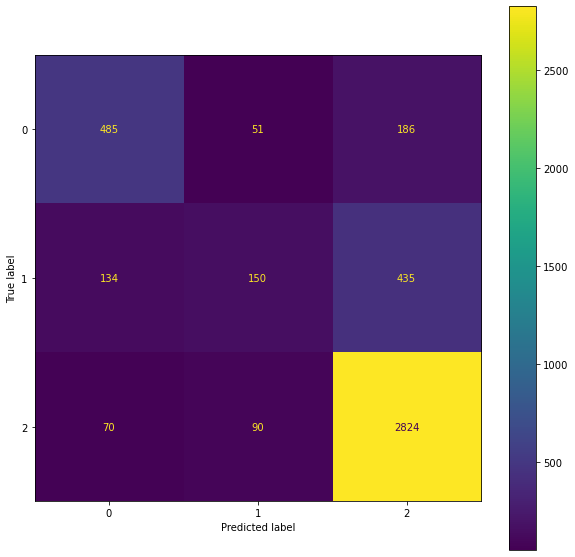

In [13]:
conmat = np.array(confusion_matrix(y_test, 
                                   logreg.predict(X_test), 
                                   labels=[0, 1, 2]))

print(classification_report(y_test,
                            logreg.predict(X_test), 
                            target_names=['No', "Don't know", 'Yes']))

matrix_display = ConfusionMatrixDisplay(confusion_matrix=conmat, 
                                        display_labels=logreg.classes_)
matrix_display.plot()

figure = plt.gcf()
figure.set_size_inches(10, 10)
;

### Analysis

- Overall, this logistic regression model was 78% accurate in predicting the target class. This is 11% more accurate than our baseline model with 67% probability. 
- It was the most precise in predicting the "Yes" class, with a precision of 82%. The precision for predicting "No" is 52% and the precision for predicting "Don't know" is 52% precise. 
- Since this is a multi-class logistic regression model, the coefficients for each class are different, but the features with the largest absolute coefficients are mostly the same. 
    - `when_harm_US`
    - `sci_consensus`
    - `cause_recoded`
    - `part_x_ideo`
    - `harm_personally`
    - `harm_plants_animals`
- As this model is clearly interpretable in terms of feature importance, we further analyzed these features to make inferences about the general population and how we can make recommendations to politicians and environmental activists on how to educate people in the "No" and "Don't know" classes about global warming and persuade them to believe in the facts and science. 